# Data Mining Project

### Group : Data Discoverers 

- Dheeraj Mekala
- Varun Kumar Tirumalasetty 
- Venkata Sai Satvik Reddy Tanuboddi
- Sandeep Reddy Nimma
- Sandeep Karanam 

# Problem Statement

Malware is an ever-evolving threat, and addressing it requires a broader perspective. Excessive permissions requested by Android applications are a concern, while iOS often maintains location settings, potentially enabling data collection for malicious purposes. Notably, data collected by platforms like Facebook and Instagram raises questions about integrity and user consent. We analyze such cases to develop an understanding of how data collected can be exploited in the future.

The dataset contains permissions extracted from more than 29000 benign & malware Android apps released between 2010-2019. The instances in this dataset represent presence of a permission in an app.The goal is to build a predictive model to determine whether Android apps are malware or not based on the permissions they are using. 

The future goal is to develop an AI and machine learning algorithm that empowers users to control collected data, its movement, and destination. This entails creating a custom API as a data firewall. The primary objective is to safeguard data integrity, given instances of apps misusing permissions for blackmail, leading to tragic consequences. The model aims to prevent such occurrences in the future and protect user privacy.


# Objectives

### In this notebook, we will walkthrough below steps:
- Exploratory Data Analysis: This involves exploring and understanding the characteristics of our dataset.
- Preprocessing data: Cleaning and transforming our dataset to make it fit for modelling.
- Train Test split: Segregating our data into training and testing sets.
- Prediction using
- 1.	Logistic Regression
- 2.	KNN
- 3.	SVM Models
- 4.	Decision Tree  
- 5.	Random Forest
- 6.	AdaBoost
- 7.	XGboost
- 8.	MLP ( not in the existing dataset)
- Metrics evaluation and finding the model with the best accuracy.


# Identifying Evaluation Metric

we're creating a model to determine whether Android apps are harmful or safe to use. We want to ensure that the model doesn't mistakenly identify safe apps as harmful, and, at the same time, we want to avoid missing harmful apps. we are assuming the costs of False positives and False negatives as same.


- **True Positives (TP):** These are instances where the model correctly identifies a harmful app as harmful. For example, when the model says, "This app is harmful," and it's right.

- **True Negatives (TN):** These are cases where the model correctly identifies a safe app as safe. For example, when the model says, "This app is safe," and it's right.

- **False Positives (FP):** These occur when the model incorrectly identifies a safe app as harmful. It's a mistake where the model says, "This app is harmful," but it's actually safe.

- **False Negatives (FN):** These happen when the model incorrectly identifies a harmful app as safe. It's a mistake where the model says, "This app is safe," but it's actually harmful.


 We choose **Accuracy** and **F1_score** as our evaluation metrics as they are a measure of how often the model gets it right, both in terms of identifying harmful apps and safe apps. It considers all types of correct and incorrect predictions. we're equally concerned about false positives and false negatives and we have a balanced dataset.


# Importing necessary libraries

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import pickle
import seaborn as sns
from sklearn.decomposition import PCA


np.random.seed(42)

In [21]:
%matplotlib widget

# Load the Data

In [22]:
df=pd.read_csv('data.csv')

# Preliminary Analysis

In [4]:
df

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29327,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
print(df.describe())

       android.permission.GET_ACCOUNTS  \
count                     29332.000000   
mean                          0.226033   
std                           0.418268   
min                           0.000000   
25%                           0.000000   
50%                           0.000000   
75%                           0.000000   
max                           1.000000   

       com.sonyericsson.home.permission.BROADCAST_BADGE  \
count                                      29332.000000   
mean                                           0.034263   
std                                            0.181907   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            1.000000   

       android.permission.READ_PROFILE  android.permission.MANAGE_ACCOUNTS  \
count      

`df.describe()` provided summary statistics for numerical features, offering insights into the data's distribution and helping us identify outliers. These commands are fundamental for initial data exploration and understanding the dataset's characteristics.

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29332 entries, 0 to 29331
Data columns (total 87 columns):
 #   Column                                                                         Non-Null Count  Dtype
---  ------                                                                         --------------  -----
 0   android.permission.GET_ACCOUNTS                                                29332 non-null  int64
 1   com.sonyericsson.home.permission.BROADCAST_BADGE                               29332 non-null  int64
 2   android.permission.READ_PROFILE                                                29332 non-null  int64
 3   android.permission.MANAGE_ACCOUNTS                                             29332 non-null  int64
 4   android.permission.WRITE_SYNC_SETTINGS                                         29332 non-null  int64
 5   android.permission.READ_EXTERNAL_STORAGE                                       29332 non-null  int64
 6   android.permission.RECEIVE_SMS        

We used `df.info()` to get an overview of the dataset's structure, such as the number of non-null entries and data types, ensuring there were no missing values. 

# Data Cleaning

In [7]:
# Checking for missing values
Missing_values= df.isnull().sum()

In [8]:
Missing_values

android.permission.GET_ACCOUNTS                                           0
com.sonyericsson.home.permission.BROADCAST_BADGE                          0
android.permission.READ_PROFILE                                           0
android.permission.MANAGE_ACCOUNTS                                        0
android.permission.WRITE_SYNC_SETTINGS                                    0
                                                                         ..
com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE    0
com.huawei.android.launcher.permission.READ_SETTINGS                      0
android.permission.READ_SMS                                               0
android.permission.PROCESS_INCOMING_CALLS                                 0
Result                                                                    0
Length: 87, dtype: int64

In [9]:
df.isnull().sum().sum()

0

We employed a thorough examination of our dataset using the `df.isnull().sum()` method, which revealed the absence of any null or missing values. This data check ensures that our dataset is pristine, enhancing the reliability of our analysis and modeling processes.

### Check the variable types

In [10]:
df.dtypes

android.permission.GET_ACCOUNTS                                           int64
com.sonyericsson.home.permission.BROADCAST_BADGE                          int64
android.permission.READ_PROFILE                                           int64
android.permission.MANAGE_ACCOUNTS                                        int64
android.permission.WRITE_SYNC_SETTINGS                                    int64
                                                                          ...  
com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE    int64
com.huawei.android.launcher.permission.READ_SETTINGS                      int64
android.permission.READ_SMS                                               int64
android.permission.PROCESS_INCOMING_CALLS                                 int64
Result                                                                    int64
Length: 87, dtype: object

all the attributes in the dataset are of integer datatype

# Exploratory Data Analysis (EDA) and Visualization

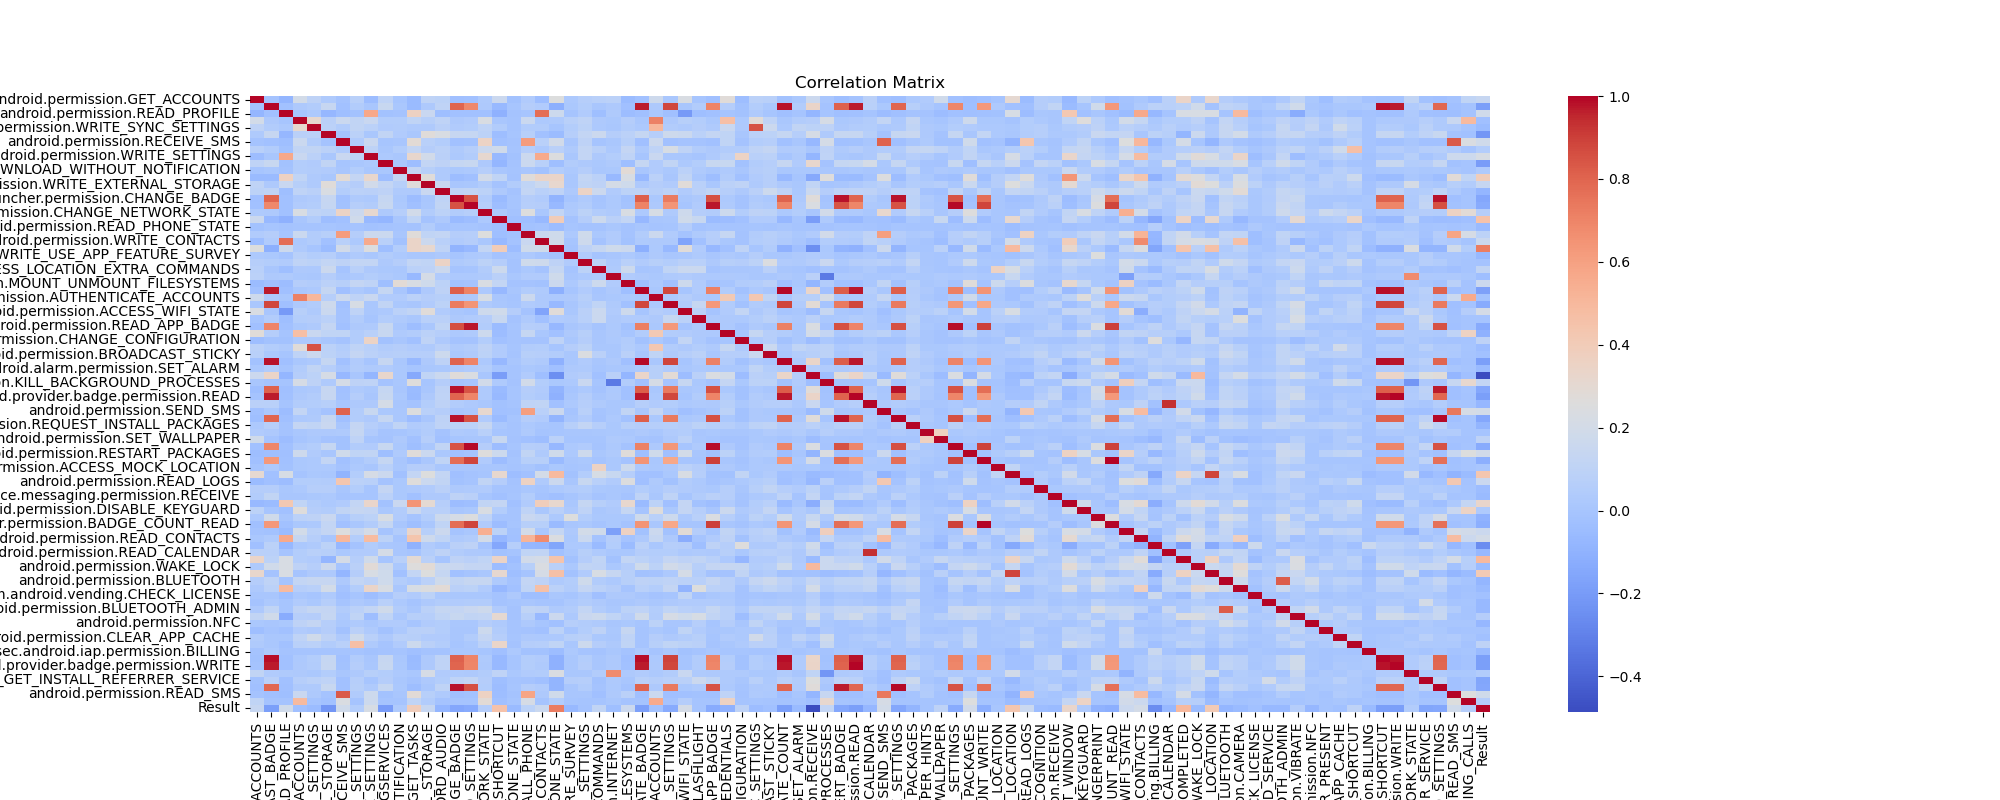

In [11]:
# Correlation Analysis
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The image shows a correlation matrix comparing Android app permissions, displaying how permissions correlate with each other and with an outcome variable, likely indicating malware presence. The dark red diagonal line indicates a perfect positive correlation with itself. Clusters of red off-diagonal squares suggest a high positive correlation, meaning these permissions are often requested together. Light blue squares indicate weak negative correlations. Permissions strongly correlated with the "Result" might signify their relevance to malware. Due to small text, individual permissions and correlations are unclear, suggesting a need for more accessible data representation for detailed analysis. This matrix helps in identifying permission patterns characteristic of malware.

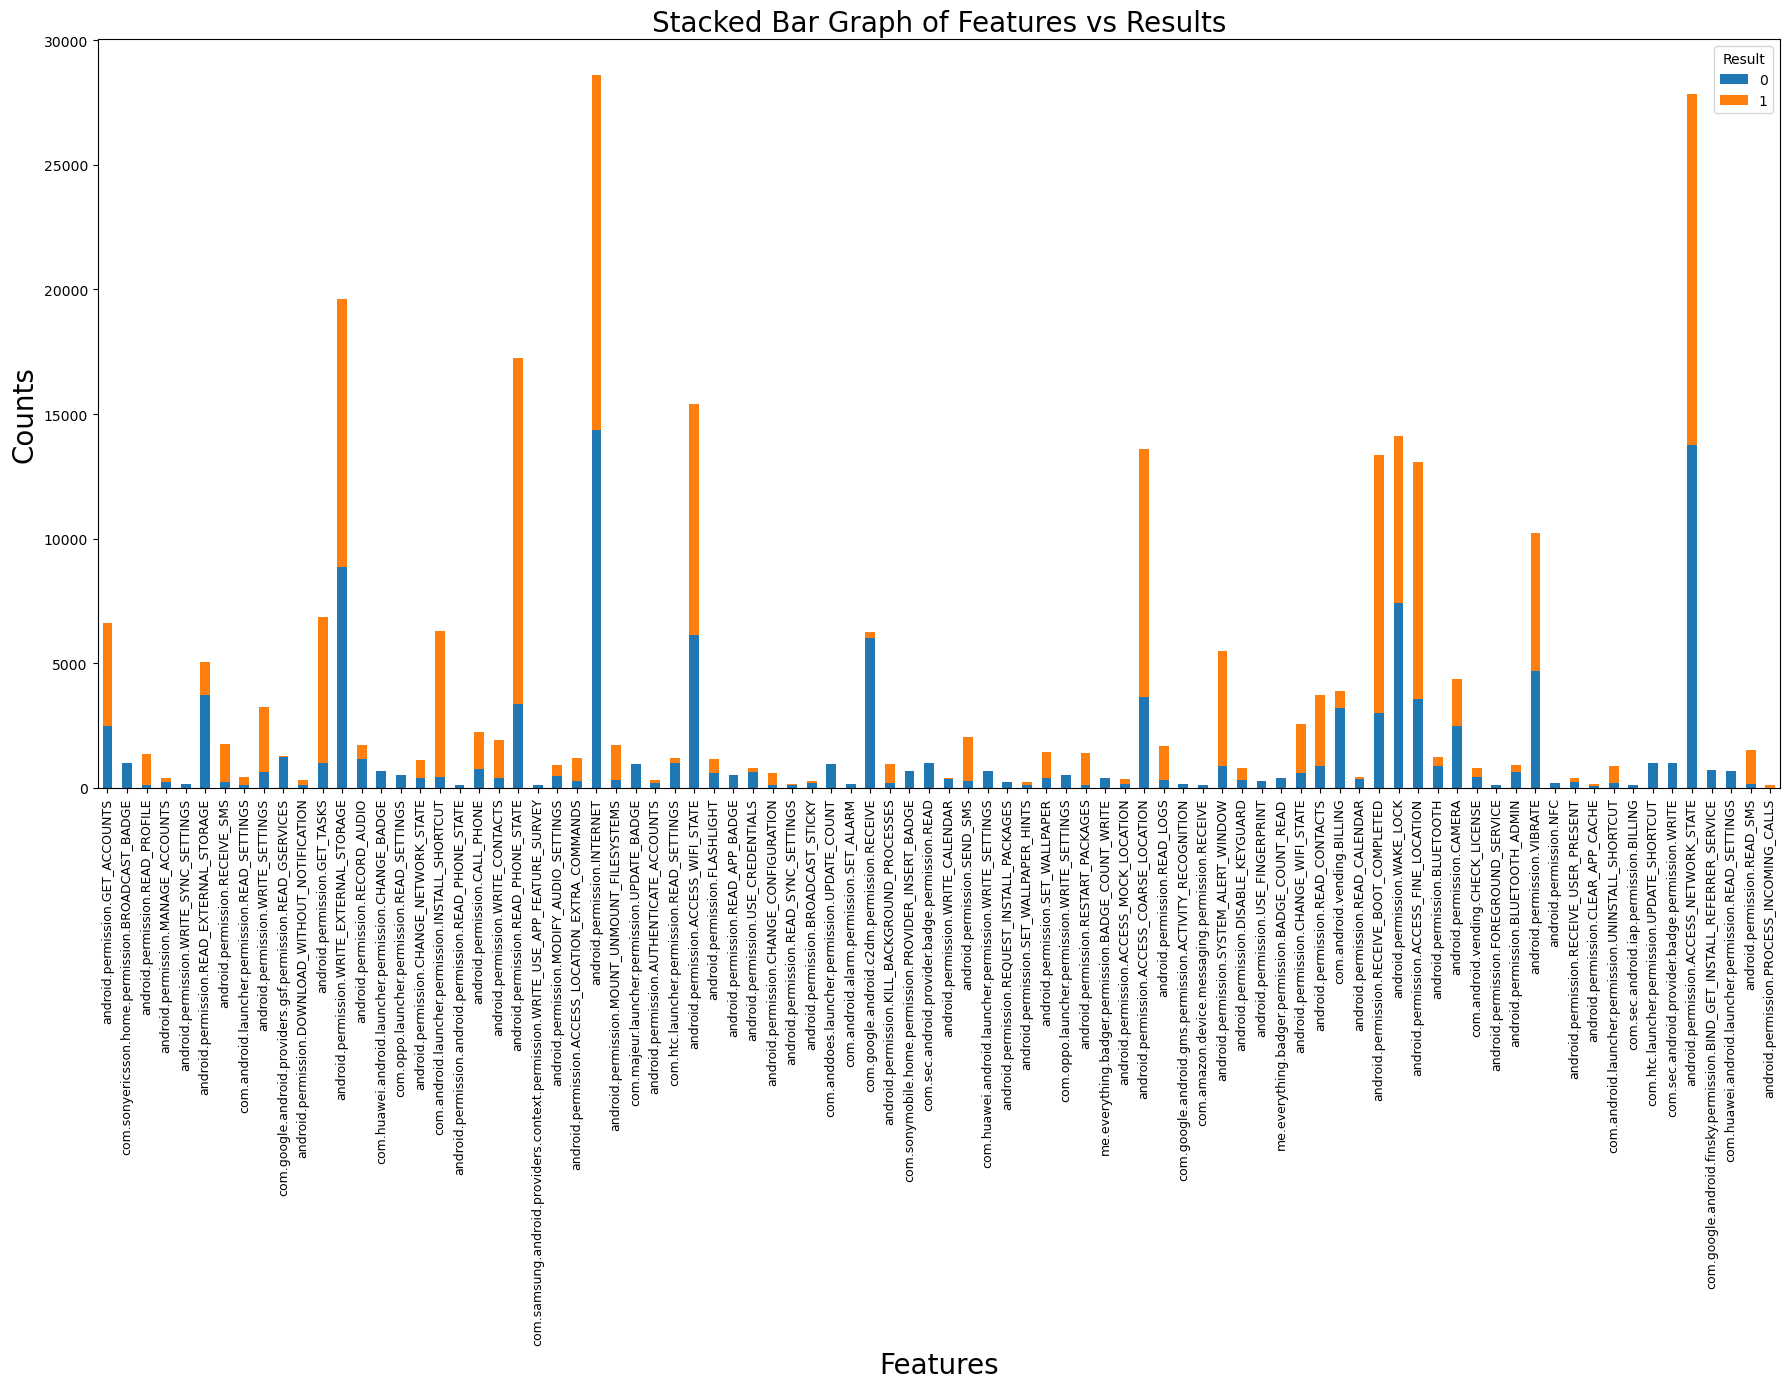

In [11]:
# Let's count the occurrences of each feature for each result category
feature_counts = df.groupby('Result').sum().T

# Now let's create the stacked bar graph
feature_counts.plot(kind='bar', stacked=True, figsize=(18, 14))

plt.title('Stacked Bar Graph of Features vs Results', size = 20)
plt.xlabel('Features', size = 20)
plt.ylabel('Counts', size = 20)
plt.xticks(rotation=90,size = 9)  # Rotate feature names to prevent overlap
plt.legend(title='Result')

# You might want to adjust the font size and layout for better clarity, especially if you have many features
plt.tight_layout()

plt.show()

The image presents a stacked bar graph, showing the counts of various features against two possible results, indicated as 0 and 1. Each bar represents a feature, likely an app permission, and the counts are divided between the two results, which could represent non-malware (0) and malware (1) instances. The blue and orange segments of each bar correspond to how often each permission is associated with either result. Taller bars show more frequent occurrences of that feature across the dataset. This visualization helps identify which permissions are common in benign vs. malicious apps, aiding in feature selection for malware detection models. However, the specific feature names are too small to read, and the counts for each category are not discernible due to the size of the image.

## How many Permissions are triggered for malaware apps?

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

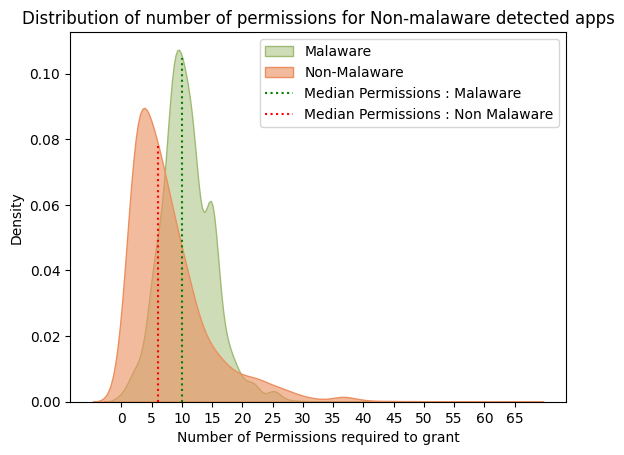

In [91]:
#what permissions are violated most for malaware apps?
mal = df[df.Result==1]
sns.kdeplot((mal.drop(['Result'],axis=1).sum(axis=1)).values,fill=True,color="#9FBB73",bw_adjust=1.6,alpha=0.5,label='Malaware')

median_value_mal = mal.drop(['Result'],axis=1).sum(axis=1).median()

# Draw a vertical dotted line at the median


plt.title("Distribution of number of permissions for malaware detected apps")
plt.xlabel("Number of Permissions required to grant")
non_mal = df[df.Result==0]
sns.kdeplot((non_mal.drop(['Result'],axis=1).sum(axis=1)).values,fill=True,color="#EC8F5E",bw_adjust=1.6,alpha=0.6,label='Non-Malaware')

median_value = non_mal.drop(['Result'],axis=1).sum(axis=1).median()
plt.axvline(median_value_mal, color='green', linestyle='dotted', label="Median Permissions : Malaware",ymax=0.93)
# Draw a vertical dotted line at the median
plt.axvline(median_value, color='red', linestyle='dotted', label="Median Permissions : Non Malaware",ymax=0.7)

plt.title("Distribution of number of permissions for Non-malaware detected apps")
plt.xlabel("Number of Permissions required to grant")
plt.xticks(np.arange(0,70,5))
plt.legend()
#plt.show()

plt.show()

The graph shows that malware apps typically request more permissions than non-malware apps, with both distributions skewed right. However, there's significant overlap between them, indicating that the number of permissions alone isn't a definitive indicator of malware. Median permissions are higher for malware than for non-malware.

In [14]:
Malaware = df[df.Result==1].drop(['Result'],axis=1)
Non_Malaware = df[df.Result==0].drop(['Result'],axis=1)

In [15]:
Malaware_permissions = pd.DataFrame(Malaware.sum(axis=0)).reset_index()
Malaware_permissions.columns = ['Permission','Number of Permissions']
Malaware_permissions['Permission'] = Malaware_permissions['Permission'].map(lambda x: x.split('.')[-1])
Malaware_permission = Malaware_permissions.drop_duplicates(['Permission'])
Malaware_permissions['text'] =  Malaware_permissions[['Permission','Number of Permissions']].apply(lambda x : x[1]* [x[0]],axis=1)

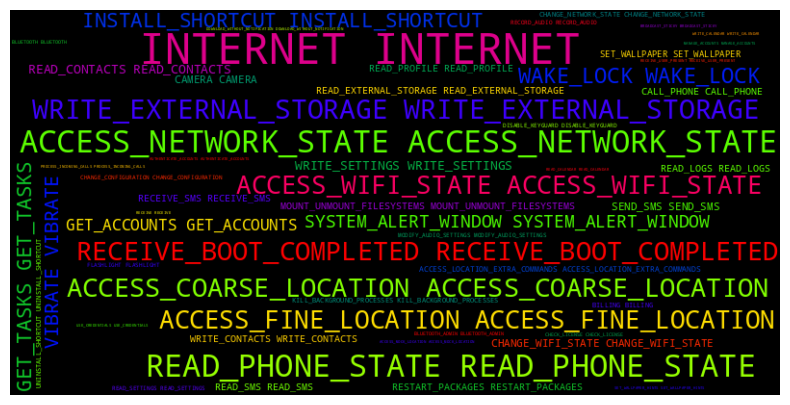

In [159]:



# Create a WordCloud object with desired parameters
wordcloud = WordCloud(
    width=800,  # Width of the output image
    height=400,  # Height of the output image
    background_color='black',  # Background color of the word cloud
    colormap='prism',  # Color map for the word cloud
    max_words=1000,  # Maximum number of words to display
).generate(''.join([' '.join(i) for i in Malaware_permissions.text]))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))  # Set the figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()

In this word cloud, the size of each permission name corresponds to its frequency in the dataset of malware applications. Larger text indicates more frequent permissions, providing a visual indication of which permissions are most commonly requested by malware. This can be a useful method for quickly identifying which permissions might be more indicative of suspicious app behavior.

## Identifying Imbalance

In [23]:
# Check for class imbalance
print("\nClass Distribution:")
print(df['Result'].value_counts())


Class Distribution:
Result
1    14700
0    14632
Name: count, dtype: int64


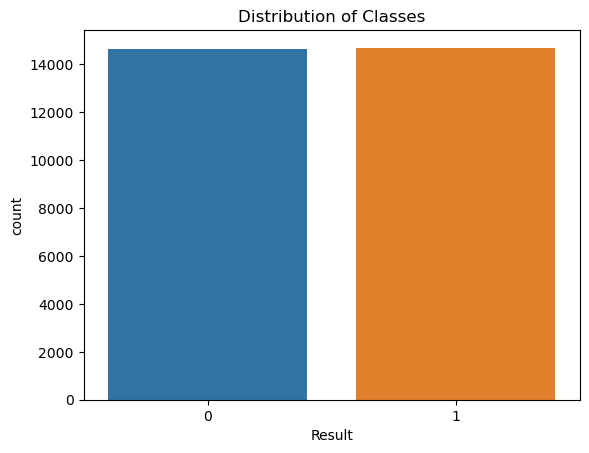

In [13]:
sns.countplot(x='Result', data=df)
plt.title('Distribution of Classes')
plt.show()

One notable characteristic of our dataset is its inherently balanced class distribution. This means that the number of instances belonging to each class, in this case, distinguishing between benign and malicious apps, is approximately equal.

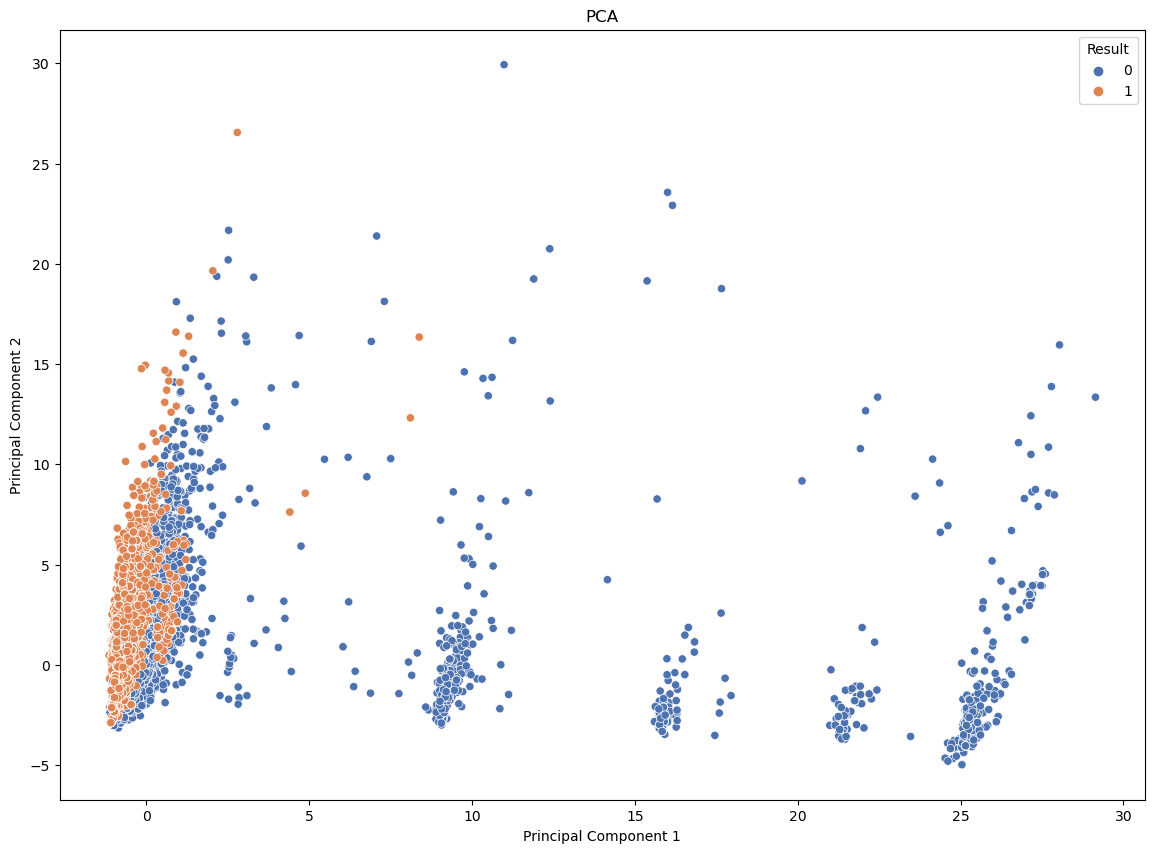

In [14]:
# Assuming the last column 'Result' is the label and the rest are features
features = df.columns[:-1]
X = df[features]

# Standardize the features before performing PCA
X_standardized = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(X_standardized)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the principal components and the labels for visualization
final_df = pd.concat([principal_df, df[['Result']]], axis=1)

# Plot the visualization of the 2D projection
plt.figure(figsize=(14, 10))
sns.scatterplot(x="PC1", y="PC2", hue="Result", data=final_df, palette="deep", legend="full")
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

This code performs Principal Component Analysis (PCA) and visualizes the data:

- Features are standardized for PCA.
- PCA reduces the data to 2 dimensions.
- Principal components are stored in `principal_df`.
- The labels are concatenated with principal components in `final_df`.
- A 2D scatter plot is created to visualize the data.


### Train/Test Split Data

Our dataset contains 29,000 observations. The chosen split ratio is 80-20, meaning that 80% of the data will be used for training the model, and the remaining 20% for testing.

### Why the 80-20 Split Ratio?

The 80-20 split ratio is a commonly used choice in the machine learning community, and it strikes a balance between model training and testing. Here's why this ratio is a good choice:

1. Sufficient Training Data: With 80% of the data allocated for training, the model has a substantial amount of data to learn from, making it more likely to capture underlying patterns in the data.

2. Adequate Testing Data: Reserving 20% for testing ensures that you have a reasonable amount of data to evaluate the model's performance. This helps in estimating how well the model will generalize to new, unseen data.

3. Balance Between Bias and Variance: The 80-20 split helps maintain a balance between bias and variance. It prevents the model from being too complex (high variance) or too simple (high bias).

### Dataset Characteristics

It's important to note that the dataset has specific characteristics:

1. No Null Values: The dataset is clean and does not contain any missing or null values. This eliminates the need for imputation, saving time and complexity in the preprocessing phase.

2. Categorical Features with Binary Values (0, 1): The dataset contains categorical features, where each feature can take on one of two values: 0 or 1. This binary encoding is common for categorical variables, and it is suitable for various machine learning algorithms.

3. No Imbalance : Our dataset is a balanced one where both classes are equally balanced as shown above.


In [25]:
features = df.drop(columns=['Result'])
target = df['Result']

# split the data into validation and training set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

# Model Fitting


**Model Optimization and Parameter Tuning**

As part of our rigorous model development process, we employed a robust 5-fold grid search validation method to optimize and fine-tune our predictive models. The objective was to identify the most effective set of hyperparameters for each model, ensuring that they perform at their best.

**Grid Search Validation**

Grid search validation is a systematic technique where a predefined set of hyperparameter values is exhaustively evaluated to identify the combination that produces the best model performance. In our case, we used `pickle` module to conduct grid search separately for each model on X_train,X_test,y_train,y_test, considering different hyperparameters, on various subsets of the team's dataset.

**Collaborative Approach**

One noteworthy aspect of our approach is that each team member individually conducted grid search for their respective models as we split among oursellves. The process was carried out independently to ensure thorough exploration of hyperparameter spaces. 

**Best Parameters in Model Fitting**

In this phase of model training, we loaded the best parameters obtained through the grid search validation process. This step significantly contributed to the efficiency and effectiveness of our models, as they were pre-optimized for performance.

**Submission of Notebooks**

As part of our commitment to transparency and collaboration, we will include the notebooks detailing our grid search process in our submission. This will provide an in-depth view of our hyperparameter tuning efforts and contribute to the integrity and replicability of our results.

## Fit the Logistic Regression

In [88]:
# Create a LogisticRegression model
model = LogisticRegression(C=0.1, penalty='l2', solver='newton-cg')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [89]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = y_pred
results.head(20)

,actual,predicted
20492,1,1
12508,0,0
9427,0,0
10994,0,0
3158,0,0
5020,0,0
183,0,0
21591,1,1
2798,0,1
8809,0,0


## Measure performance of model using accuracy, classification report and  confusion matrix 

In [92]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# f1_score
f1 = f1_score(y_test,y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)


print(f' Accuracy: {accuracy}')
print(f' f1_score: {f1}')
print(f' Classification Report: \n{class_report}')# display the Classification Report


 Accuracy: 0.9558547809783535
 f1_score: 0.9558998808104887
 Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2956
           1       0.95      0.96      0.96      2911

    accuracy                           0.96      5867
   macro avg       0.96      0.96      0.96      5867
weighted avg       0.96      0.96      0.96      5867



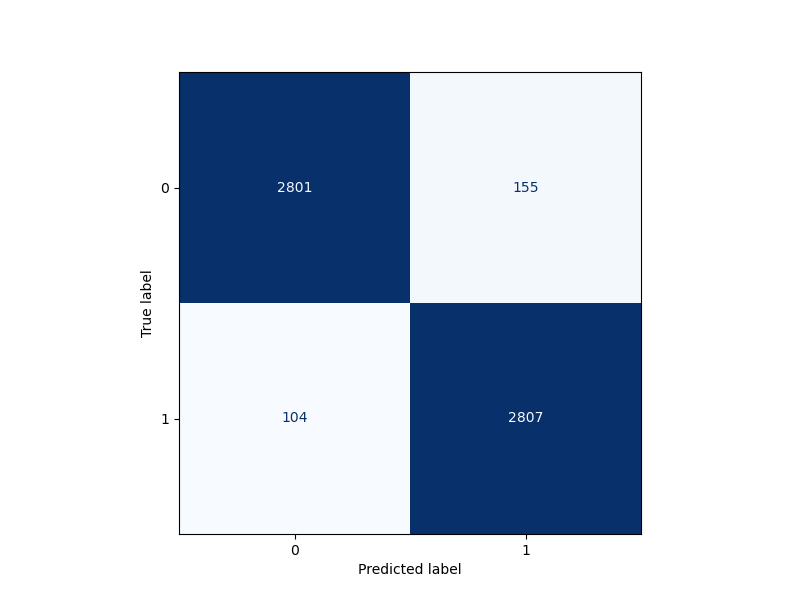

In [31]:
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()


## Logistic Regression Model Evaluation

In this evaluation, our logistic regression model achieved an impressive accuracy of approximately 95.58% and f1_score of 0.956. The confusion matrix helps us understand the model's performance.

- **True Positives (TP):** 2807 - malware apps correctly predicted as malware.
- **True Negatives (TN):** 2801 - benign apps correctly predicted as benign.
- **False Positives (FP):** 155 - benign apps mistakenly predicted as malware.
- **False Negatives (FN):** 104 - malware apps mistakenly predicted as benign.

This high accuracy indicates that our model effectively identified both malware and benign apps. The number of false predictions (FP and FN) is relatively low, which is a positive sign.


## Fit the KNeighbours Classifier

In [93]:
# Use KNeighborsClassifier from sklearn.linear_model to create a predictive model. 
model=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 6, weights= 'distance')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [94]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = y_pred
results.head(20)

,actual,predicted
20492,1,1
12508,0,0
9427,0,0
10994,0,0
3158,0,0
5020,0,0
183,0,0
21591,1,1
2798,0,1
8809,0,0


## Measure performance of model using accuracy, classification report and  confusion matrix 

In [95]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# f1_score
f1 = f1_score(y_test,y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)


print(f' Accuracy: {accuracy}')
print(f' f1_score: {f1}')
print(f' Classification Report: \n{class_report}')# display the Classification Report

 Accuracy: 0.9655701380603375
 f1_score: 0.9652801650051565
 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2956
           1       0.97      0.96      0.97      2911

    accuracy                           0.97      5867
   macro avg       0.97      0.97      0.97      5867
weighted avg       0.97      0.97      0.97      5867



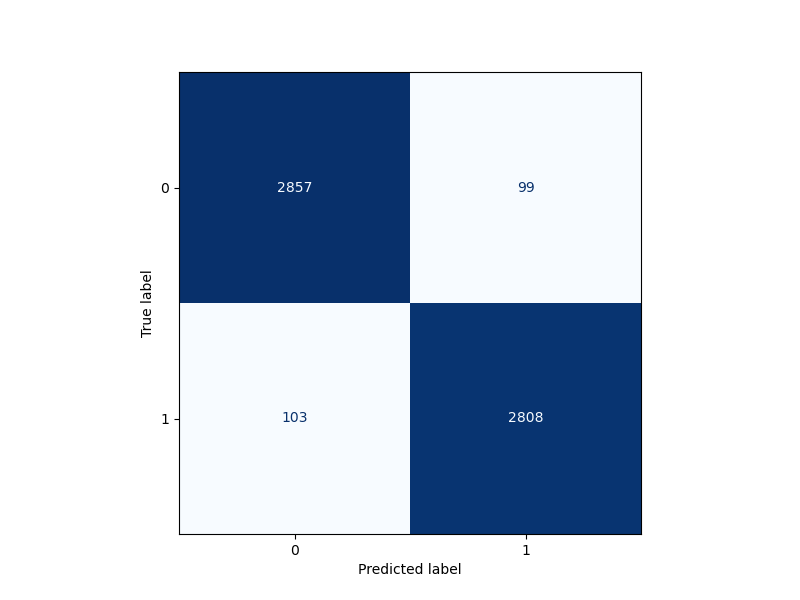

In [96]:
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()


## KNeighborsClassifier Model Evaluation

In this evaluation, our KNeighborsClassifier model achieved an impressive accuracy of approximately 96.55% and f1_score of 0.965. The confusion matrix helps us understand the model's performance.

- **True Positives (TP):** 2857 - malware apps correctly predicted as malware.
- **True Negatives (TN):** 2808 - benign apps correctly predicted as benign.
- **False Positives (FP):** 99 - benign apps mistakenly predicted as malware.
- **False Negatives (FN):** 103 - malware apps mistakenly predicted as benign.

This high accuracy indicates that our model effectively identified both malware and benign apps. The number of false predictions (FP and FN) is relatively low, which is a positive sign.


## Fit the SVC Model

In [97]:
# Use SVC from to create a predictive model. 
model=SVC(C= 100, gamma= 0.01, kernel= 'rbf')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [98]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = y_pred
results.head(20)

,actual,predicted
20492,1,1
12508,0,0
9427,0,0
10994,0,0
3158,0,0
5020,0,0
183,0,0
21591,1,1
2798,0,0
8809,0,0


## Measure performance of model using accuracy, classification report and  confusion matrix 

In [99]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# f1_score
f1 = f1_score(y_test,y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)


print(f' Accuracy: {accuracy}')
print(f' f1_score: {f1}')
print(f' Classification Report: \n{class_report}')# display the Classification Report

 Accuracy: 0.9645474688938128
 f1_score: 0.9642488827775869
 Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2956
           1       0.96      0.96      0.96      2911

    accuracy                           0.96      5867
   macro avg       0.96      0.96      0.96      5867
weighted avg       0.96      0.96      0.96      5867



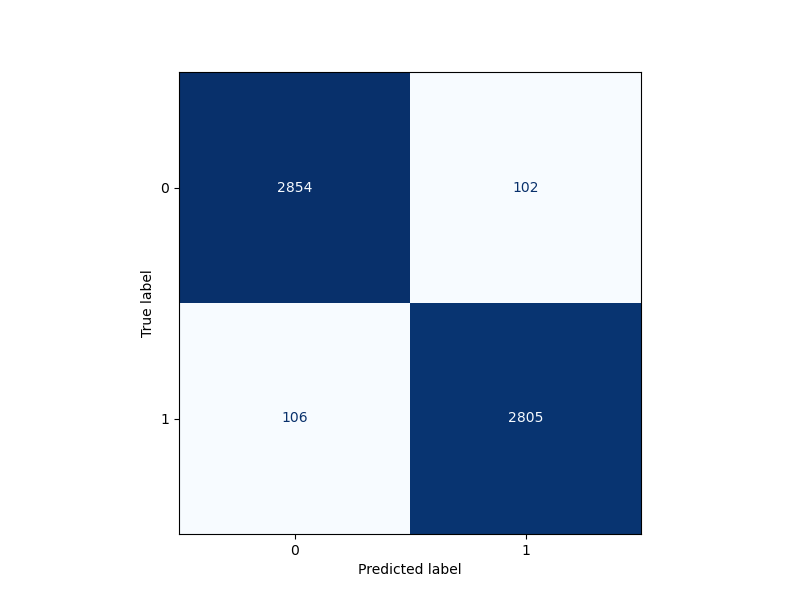

In [43]:
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()


## SVC Model Evaluation

In this evaluation, our SVC model achieved an impressive accuracy of approximately 96.45% and f1_score of 0.964. The confusion matrix helps us understand the model's performance.

- **True Positives (TP):** 2854 - malware apps correctly predicted as malware.
- **True Negatives (TN):** 2805 - benign apps correctly predicted as benign.
- **False Positives (FP):** 102 - benign apps mistakenly predicted as malware.
- **False Negatives (FN):** 106 - malware apps mistakenly predicted as benign.

This high accuracy indicates that our model effectively identified both malware and benign apps. The number of false predictions (FP and FN) is relatively low, which is a positive sign.


## Fit the Decision Tree Classifier

In [100]:
# Use DecisionTreeClassifier to create a predictive model. 
model=DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_leaf=4, min_samples_split=10)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)




In [101]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = y_pred
results.head(20)

,actual,predicted
20492,1,1
12508,0,0
9427,0,0
10994,0,0
3158,0,0
5020,0,0
183,0,0
21591,1,1
2798,0,1
8809,0,0


## Measure performance of model using accuracy, classification report and  confusion matrix 

In [102]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# f1_score
f1 = f1_score(y_test,y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)


print(f' Accuracy: {accuracy}')
print(f' f1_score: {f1}')
print(f' Classification Report: \n{class_report}')# display the Classification Report

 Accuracy: 0.9594341230611897
 f1_score: 0.9587235518557059
 Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2956
           1       0.97      0.95      0.96      2911

    accuracy                           0.96      5867
   macro avg       0.96      0.96      0.96      5867
weighted avg       0.96      0.96      0.96      5867



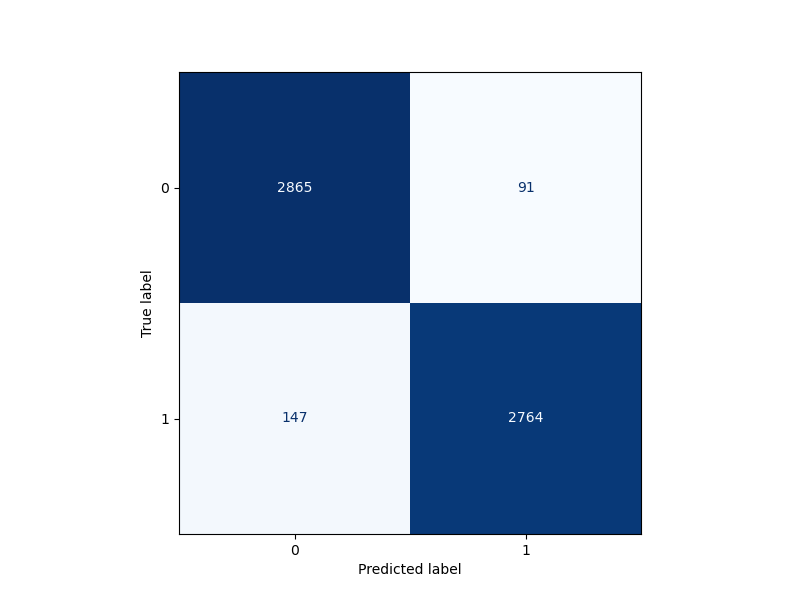

In [103]:
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()


## DecisionTreeClassifier Model Evaluation

In this evaluation, our DecisionTreeClassifier model achieved an impressive accuracy of approximately 95.94% and f1_score of 0.959. The confusion matrix helps us understand the model's performance.

- **True Positives (TP):** 2865 - malware apps correctly predicted as malware.
- **True Negatives (TN):** 2764 - benign apps correctly predicted as benign.
- **False Positives (FP):** 91 - benign apps mistakenly predicted as malware.
- **False Negatives (FN):** 147 - malware apps mistakenly predicted as benign.

This high accuracy indicates that our model effectively identified both malware and benign apps. The number of false predictions (FP and FN) is relatively low, which is a positive sign.


## Fit the Random Forest Classifier

In [104]:
# Use RandomForestClassifier to create a predictive model. 
model=RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,n_estimators=300)


# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [105]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = y_pred
results.head(20)

,actual,predicted
20492,1,1
12508,0,0
9427,0,0
10994,0,0
3158,0,0
5020,0,0
183,0,0
21591,1,1
2798,0,1
8809,0,0


## Measure performance of model using accuracy, classification report and  confusion matrix 

In [106]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# f1_score
f1 = f1_score(y_test,y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)


print(f' Accuracy: {accuracy}')
print(f' f1_score: {f1}')
print(f' Classification Report: \n{class_report}')# display the Classification Report

 Accuracy: 0.9659110277825124
 f1_score: 0.9656829100892245
 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2956
           1       0.96      0.97      0.97      2911

    accuracy                           0.97      5867
   macro avg       0.97      0.97      0.97      5867
weighted avg       0.97      0.97      0.97      5867



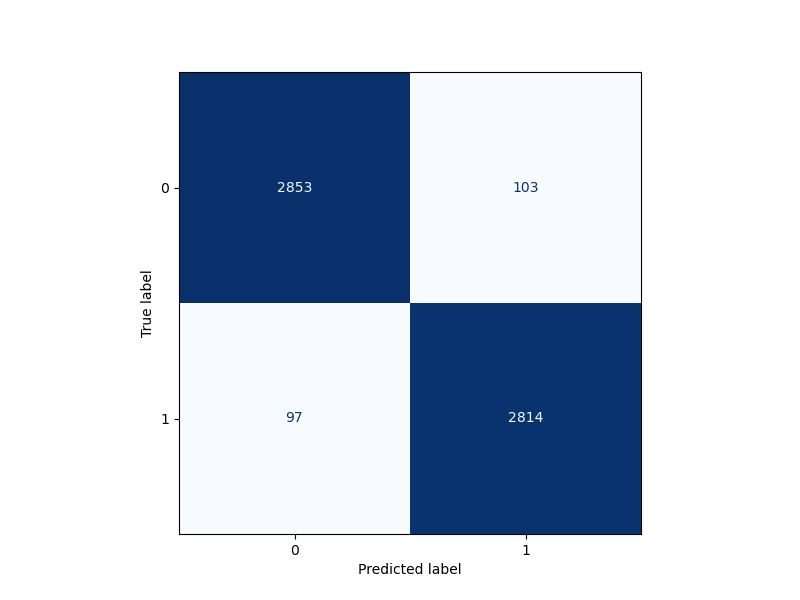

In [107]:
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()


## RandomForestClassifier Model Evaluation

In this evaluation, our RandomForestClassifier model achieved an impressive accuracy of approximately 96.59% and f1_score of 0.966. The confusion matrix helps us understand the model's performance.

- **True Positives (TP):** 2853 - malware apps correctly predicted as malware.
- **True Negatives (TN):** 2814 - benign apps correctly predicted as benign.
- **False Positives (FP):** 103 - benign apps mistakenly predicted as malware.
- **False Negatives (FN):** 97 - malware apps mistakenly predicted as benign.

This high accuracy indicates that our model effectively identified both malware and benign apps. The number of false predictions (FP and FN) is relatively low, which is a positive sign.


## Fit the  AdaBoost Classifier

In [108]:
# You can use a DecisionTreeClassifier as the base estimator
# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=3, min_samples_split=4)

# Create an AdaBoostClassifier model
model = AdaBoostClassifier(base_estimator=base_estimator, learning_rate=0.5, n_estimators=150)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


C:\Users\sande\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [109]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = y_pred
results.head(20)

,actual,predicted
20492,1,1
12508,0,0
9427,0,0
10994,0,0
3158,0,0
5020,0,0
183,0,0
21591,1,1
2798,0,0
8809,0,0


## Measure performance of model using accuracy, classification report and  confusion matrix 

In [110]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# f1_score
f1 = f1_score(y_test,y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)


print(f' Accuracy: {accuracy}')
print(f' f1_score: {f1}')
print(f' Classification Report: \n{class_report}')# display the Classification Report

 Accuracy: 0.9679563661155616
 f1_score: 0.9675638371290546
 Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2956
           1       0.97      0.96      0.97      2911

    accuracy                           0.97      5867
   macro avg       0.97      0.97      0.97      5867
weighted avg       0.97      0.97      0.97      5867



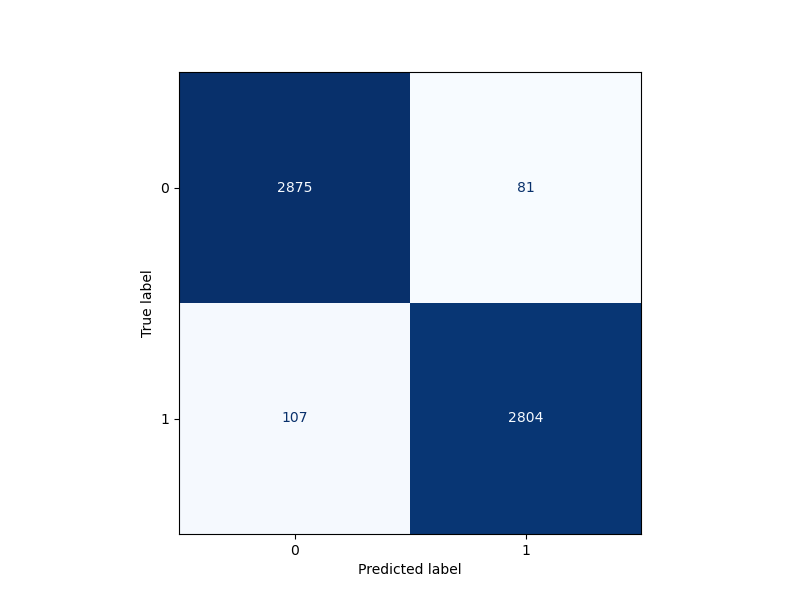

In [60]:
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()


## AdaBoostClassifier Model Evaluation

In this evaluation, our AdaBoostClassifier model achieved an impressive accuracy of approximately 96.79% and f1_score of 0.968. The confusion matrix helps us understand the model's performance.

- **True Positives (TP):** 2875 - malware apps correctly predicted as malware.
- **True Negatives (TN):** 2804 - benign apps correctly predicted as benign.
- **False Positives (FP):** 81 - benign apps mistakenly predicted as malware.
- **False Negatives (FN):** 107 - malware apps mistakenly predicted as benign.

This high accuracy indicates that our model effectively identified both malware and benign apps. The number of false predictions (FP and FN) is relatively low, which is a positive sign.


## Fit the  Xgboost Classifier

In [111]:
# Create a XGBClassifier model
model = XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8)


# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [112]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = y_pred
results.head(20)

,actual,predicted
20492,1,1
12508,0,0
9427,0,0
10994,0,0
3158,0,0
5020,0,0
183,0,0
21591,1,1
2798,0,1
8809,0,0


## Measure performance of model using accuracy, classification report and  confusion matrix 

In [113]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# f1_score
f1 = f1_score(y_test,y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)


print(f' Accuracy: {accuracy}')
print(f' f1_score: {f1}')
print(f' Classification Report: \n{class_report}')# display the Classification Report

 Accuracy: 0.9682972558377365
 f1_score: 0.9679199724042773
 Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2956
           1       0.97      0.96      0.97      2911

    accuracy                           0.97      5867
   macro avg       0.97      0.97      0.97      5867
weighted avg       0.97      0.97      0.97      5867



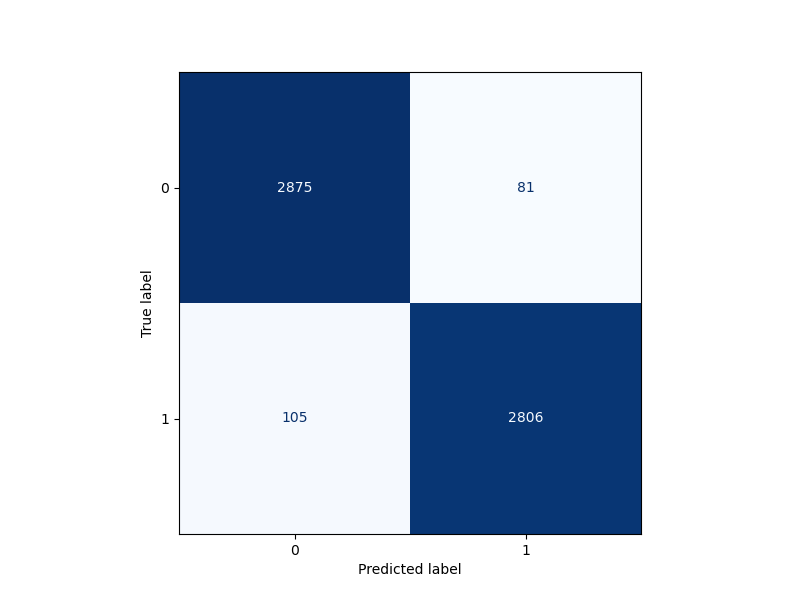

In [75]:
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()


## XGBClassifier Model Evaluation

In this evaluation, our XGBClassifier model achieved an impressive accuracy of approximately 96.82% and f1_score 0.968. The confusion matrix helps us understand the model's performance.

- **True Positives (TP):** 2875 - malware apps correctly predicted as malware.
- **True Negatives (TN):** 2806 - benign apps correctly predicted as benign.
- **False Positives (FP):** 81 - benign apps mistakenly predicted as malware.
- **False Negatives (FN):** 105 - malware apps mistakenly predicted as benign.

This high accuracy indicates that our model effectively identified both malware and benign apps. The number of false predictions (FP and FN) is relatively low, which is a positive sign.


## Fit the  MLPClassifier

In [114]:
# Create a MLPClassifier model
model = MLPClassifier(activation= 'logistic', alpha= 0.0001, hidden_layer_sizes = (100, 100, 100),learning_rate_init= 0.01)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [115]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = y_pred
results.head(20)

,actual,predicted
20492,1,1
12508,0,0
9427,0,0
10994,0,0
3158,0,0
5020,0,0
183,0,0
21591,1,1
2798,0,0
8809,0,0


## Measure performance of model using accuracy, classification report and  confusion matrix 

In [116]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# f1_score
f1 = f1_score(y_test,y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)


print(f' Accuracy: {accuracy}')
print(f' f1_score: {f1}')
print(f' Classification Report: \n{class_report}')# display the Classification Report

 Accuracy: 0.9665928072268621
 f1_score: 0.9659011830201809
 Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2956
           1       0.98      0.95      0.97      2911

    accuracy                           0.97      5867
   macro avg       0.97      0.97      0.97      5867
weighted avg       0.97      0.97      0.97      5867



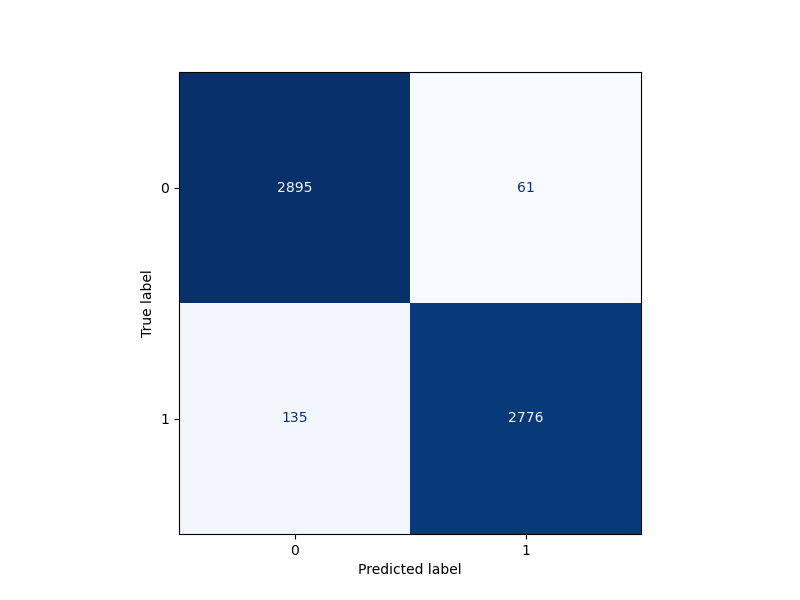

In [71]:
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()


## MLPClassifier Model Evaluation

In this evaluation, our MLPClassifier model achieved an impressive accuracy of approximately 96.65% and f1_score of 0.966. The confusion matrix helps us understand the model's performance.

- **True Positives (TP):** 2895 - malware apps correctly predicted as malware.
- **True Negatives (TN):** 2776 - benign apps correctly predicted as benign.
- **False Positives (FP):** 61 - benign apps mistakenly predicted as malware.
- **False Negatives (FN):** 135 - malware apps mistakenly predicted as benign.

This high accuracy indicates that our model effectively identified both malware and benign apps. The number of false predictions (FP and FN) is relatively low, which is a positive sign.


## Performance Metrics


| Model                | Accuracy | F1-Score  |
|----------------------|----------|-----------|
| Logistic             | 0.9559   | 0.9558    | 
| KNN                  | 0.9656   | 0.9642    |
| SVM                  | 0.9645   | 0.9587    | 
| Decision Tree        | 0.9594   | 0.9587    |
| Random Forest        | 0.9659   | 0.9656    | 
| AdaBoost             | 0.9680   | 0.9675    | 
| XGBoost Classifier   | 0.9683   | 0.9679    | 
| MLP Classifier       | 0.9666   | 0.9659    | 

## Importance of Accuracy and F1-score

In the context of NATICUSdroid, where the goal is to distinguish benign apps from malware, accuracy and F1-score are essential metrics for evaluating the performance of machine learning models.

- *Accuracy* is a fundamental metric that measures the overall correctness of a model's predictions. In this scenario, high accuracy indicates the percentage of correctly classified apps (both benign and malware). It is crucial for providing a general understanding of the model's performance.

- *F1-score* is a metric that combines precision and recall, offering a balanced measure of a model's effectiveness, particularly in situations where class imbalances exist. In the context of malware detection, F1-score is vital because it takes into account both the ability to identify malware apps (recall) and the accuracy of those identifications (precision).

## Conclusion

In the analysis of permissions to distinguish benign apps from malware in NATICUSdroid, several machine learning models were evaluated. The choice of the best model was based on hyperparameter tuning with a focus on accuracy.

The performance metrics reveal that several models, including AdaBoost, XGBoost, and MLP Classifier, consistently demonstrate strong performance with high accuracy and F1-scores. This indicates their ability to effectively identify malware apps while maintaining a good balance between precision and recall.

The choice to hyperparameter tune based on accuracy was appropriate, as accuracy is a critical metric for providing an overall understanding of a model's performance. It allows NATICUSdroid to classify apps correctly and maintain a high level of general correctness in its predictions.

Additionally, the use of F1-score is equally important because it ensures that the model excels in both identifying malware (recall) and correctly classifying those identifications (precision). The F1-score is particularly valuable in the context of malware detection where the consequences of misclassification can be severe.

In conclusion, the results indicate that NATICUSdroid is equipped with well-performing machine learning models, and the approach of balancing accuracy and F1-score is appropriate for effectively distinguishing benign apps from malware. Continued research, monitoring, and updating will ensure the system's reliability in the ever-evolving landscape of mobile malware.